In [1]:
# Plot the verification against reanalysis data:
# Plot normalized 'drmse' in lat-height coordinate
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4 as nc

In [2]:
# Create a custom colormap
from matplotlib.colors import LinearSegmentedColormap
colors = [(0, 'blue'), (0.47, 'white'),(0.53, 'white'), (1, 'red')]
tmap = LinearSegmentedColormap.from_list('custom_colormap', colors)


In [3]:
datahome    = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/GribDiag/ush/plotgribnc/data/gribnc'

timerange = '2022061500_2022071000_12'
#dirname   = 'old_ctrl-CTRL-CTRL_no_situ-ng_v0-ng_all_infla' # directory name
#dirname   = 'CTRL-ng_v0' # directory name
#dirname   = 'CTRL_no_situ-ng_v0'
#dirname   = 'CTRL-ng_all_infla'
dirname   = 'ctrl_amsua_ch5-only_clr_clr-only_clr_clr_ng-clr_and_cld_0.05-clr_and_cld_0.05_ng'

expref    = 'ctrl_amsua_ch5'
exptest   = 'only_clr_clr'

ncdir_era5 = os.path.join(datahome,'ERA5',timerange,dirname)
ncdir_ifs  = os.path.join(datahome,'IFS', timerange,dirname)

In [41]:
# read netcdfs:

### ERA5 ###
# normalized error and significant levels:
f_era = nc.Dataset(f"{ncdir_era5}/dzmean_rmse_{exptest}_f06.nc")
lat_era = f_era.variables['latitude'][:]
lev_era = f_era.variables['level'][:]
c_era   = f_era.variables['clwmr'][:]
q_era   = f_era.variables['q'][:]
t_era   = f_era.variables['t'][:]
clw_era = f_era.variables['clwmr'][:]

d95_era = nc.Dataset(f"{ncdir_era5}/d95_{exptest}_f06.nc")
d95_c_era = d95_era.variables['clwmr'][:]
d95_q_era = d95_era.variables['q'][:]
d95_t_era = d95_era.variables['t'][:]
d95_clw_era = d95_era.variables['clwmr'][:]

s95_c_era = np.abs(d95_c_era/c_era)>1.0
s95_q_era = np.abs(d95_q_era/q_era)>1.0
s95_t_era = np.abs(d95_t_era/t_era)>1.0
s95_clw_era = np.abs(d95_clw_era/clw_era)>1.0

# absolute error
f_era_test = nc.Dataset(f"{ncdir_era5}/zmean_rmse_{exptest}_f06.nc")
c_era_test = f_era_test.variables['clwmr'][:]
q_era_test = f_era_test.variables['q'][:]
t_era_test = f_era_test.variables['t'][:]
clw_era_test = f_era_test.variables['clwmr'][:]


f_era_ctrl = nc.Dataset(f"{ncdir_era5}/zmean_rmse_{expref}_f06.nc")
c_era_ctrl = f_era_ctrl.variables['clwmr'][:]
q_era_ctrl = f_era_ctrl.variables['q'][:]
t_era_ctrl = f_era_ctrl.variables['t'][:]
clw_era_ctrl = f_era_ctrl.variables['clwmr'][:]


### IFS ###
"""
# normalized error and significant levels:
f_ifs = nc.Dataset(f"{ncdir_ifs}/dzmean_rmse_{exptest}_f06.nc")
lat_ifs = f_ifs.variables['latitude'][:]
lev_ifs = f_ifs.variables['level'][:]
r_ifs   = f_ifs.variables['r'][:]
t_ifs   = f_ifs.variables['t'][:]
u_ifs   = f_ifs.variables['u'][:]    
v_ifs   = f_ifs.variables['v'][:]    

d95_ifs = nc.Dataset(f"{ncdir_ifs}/d95_{exptest}_f06.nc")
d95_r_ifs = d95_ifs.variables['r'][:]
d95_t_ifs = d95_ifs.variables['t'][:]
d95_u_ifs = d95_ifs.variables['u'][:]    
d95_v_ifs = d95_ifs.variables['v'][:]    

s95_r_ifs = np.abs(d95_r_ifs/r_ifs)>1.0
s95_t_ifs = np.abs(d95_t_ifs/t_ifs)>1.0
s95_u_ifs = np.abs(d95_u_ifs/u_ifs)>1.0  
s95_v_ifs = np.abs(d95_v_ifs/v_ifs)>1.0  

# absolute error
f_ifs_test = nc.Dataset(f"{ncdir_ifs}/zmean_rmse_{exptest}_f06.nc")
r_ifs_test = f_ifs_test.variables['r'][:]
t_ifs_test = f_ifs_test.variables['t'][:]
u_ifs_test = f_ifs_test.variables['u'][:]    
v_ifs_test = f_ifs_test.variables['v'][:]   

f_ifs_ctrl = nc.Dataset(f"{ncdir_ifs}/zmean_rmse_{expref}_f06.nc")
r_ifs_ctrl = f_ifs_ctrl.variables['r'][:]
t_ifs_ctrl = f_ifs_ctrl.variables['t'][:]
u_ifs_ctrl = f_ifs_ctrl.variables['u'][:]    
v_ifs_ctrl = f_ifs_ctrl.variables['v'][:]  
"""

'\n# normalized error and significant levels:\nf_ifs = nc.Dataset(f"{ncdir_ifs}/dzmean_rmse_{exptest}_f06.nc")\nlat_ifs = f_ifs.variables[\'latitude\'][:]\nlev_ifs = f_ifs.variables[\'level\'][:]\nr_ifs   = f_ifs.variables[\'r\'][:]\nt_ifs   = f_ifs.variables[\'t\'][:]\nu_ifs   = f_ifs.variables[\'u\'][:]    \nv_ifs   = f_ifs.variables[\'v\'][:]    \n\nd95_ifs = nc.Dataset(f"{ncdir_ifs}/d95_{exptest}_f06.nc")\nd95_r_ifs = d95_ifs.variables[\'r\'][:]\nd95_t_ifs = d95_ifs.variables[\'t\'][:]\nd95_u_ifs = d95_ifs.variables[\'u\'][:]    \nd95_v_ifs = d95_ifs.variables[\'v\'][:]    \n\ns95_r_ifs = np.abs(d95_r_ifs/r_ifs)>1.0\ns95_t_ifs = np.abs(d95_t_ifs/t_ifs)>1.0\ns95_u_ifs = np.abs(d95_u_ifs/u_ifs)>1.0  \ns95_v_ifs = np.abs(d95_v_ifs/v_ifs)>1.0  \n\n# absolute error\nf_ifs_test = nc.Dataset(f"{ncdir_ifs}/zmean_rmse_{exptest}_f06.nc")\nr_ifs_test = f_ifs_test.variables[\'r\'][:]\nt_ifs_test = f_ifs_test.variables[\'t\'][:]\nu_ifs_test = f_ifs_test.variables[\'u\'][:]    \nv_ifs_test = f_i

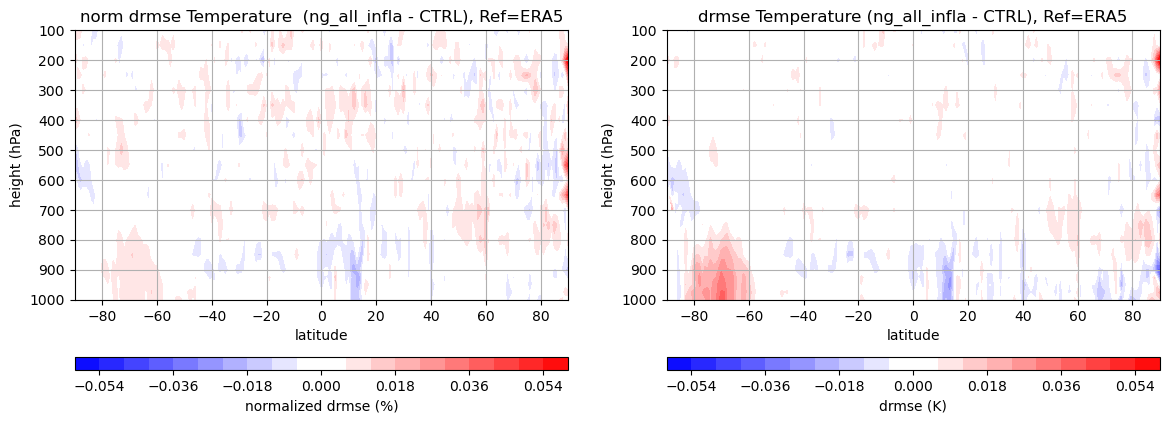

In [45]:
# For ERA5 - temperature:

lats_era, levs_era = np.meshgrid(lat_era, lev_era)

# normalized temperature
dlevs      = 0.006
dmax       = 0.06
plt_levs_tnorm = np.arange(-dmax,dmax+dlevs,dlevs)

# absolute temperature
dlevs      = 0.006
dmax       = 0.06
plt_levs_tabs = np.arange(-dmax,dmax+dlevs,dlevs)

# Main Plot section:

# figure size:
fig = plt.figure(figsize=(14,5))

# define the subplots
ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 2

# ax1: normalized error
contour1=ax1.contourf(lats_era, levs_era, t_era, cmap=tmap, levels=plt_levs_tnorm, vmin=np.min(plt_levs_tnorm), vmax=np.max(plt_levs_tnorm))
ax1.invert_yaxis()
#ax1.plot(np.ma.array(lats_era, mask=s95_t_era), levs_era, 'k+', ms=5)
ax1.set_xlabel('latitude')
ax1.set_ylabel('height (hPa)')
ax1.set_title(f'norm drmse Temperature  ({exptest} - {expref}), Ref=ERA5')
ax1.grid(True)
# set colorbar
cbar = fig.colorbar(contour1,location='bottom',aspect=40)
cbar.set_label('normalized drmse (%)')

# ax2: absoulte error
contour2 = ax2.contourf(lats_era, levs_era, (t_era_test - t_era_ctrl), cmap=tmap, levels=plt_levs_tabs, vmin=np.min(plt_levs_tabs), vmax=np.max(plt_levs_tabs))
ax2.invert_yaxis()
ax2.set_xlabel('latitude')
ax2.set_ylabel('height (hPa)')
ax2.set_title(f'drmse Temperature ({exptest} - {expref}), Ref=ERA5')
ax2.set_ylim(1000,100)
ax2.grid(True)
# set colorbar
cbar = fig.colorbar(contour2,location='bottom',aspect=40)
cbar.set_label('drmse (K)')


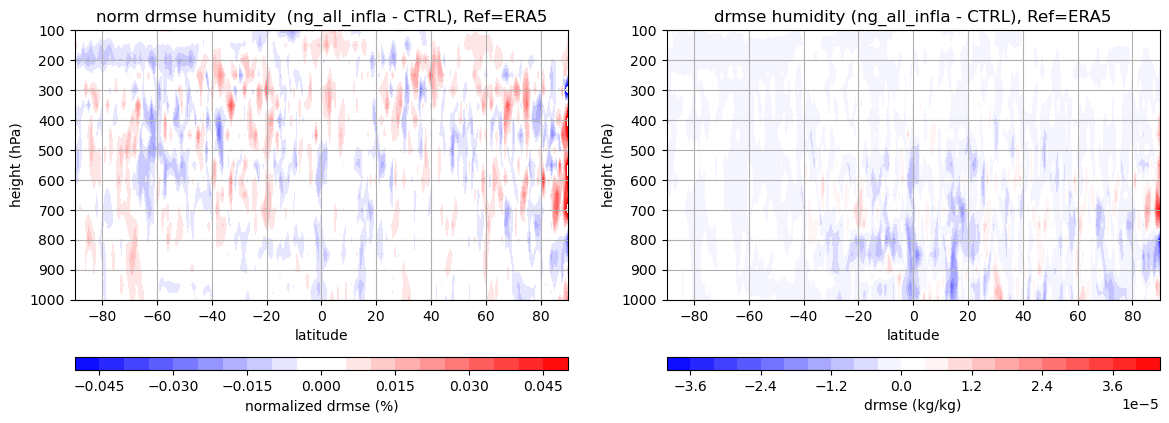

In [46]:
# For ERA5 - humidity:

lats_era, levs_era = np.meshgrid(lat_era, lev_era)

# normalized humidity
dlevs      = 0.005
dmax       = 0.05
plt_levs_tnorm = np.arange(-dmax,dmax+dlevs,dlevs)

# absolute humidity
dlevs      = 0.000004
dmax       = 0.00004
plt_levs_tabs = np.arange(-dmax,dmax+dlevs,dlevs)

# Main Plot section:

# figure size:
fig = plt.figure(figsize=(14,5))

# define the subplots
ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 2

# ax1: normalized error
contour1=ax1.contourf(lats_era, levs_era, q_era, cmap=tmap, levels=plt_levs_tnorm, vmin=np.min(plt_levs_tnorm), vmax=np.max(plt_levs_tnorm))
ax1.invert_yaxis()
#ax1.plot(np.ma.array(lats_era, mask=s95_t_era), levs_era, 'k+', ms=5)
ax1.set_xlabel('latitude')
ax1.set_ylabel('height (hPa)')
ax1.set_title(f'norm drmse humidity  ({exptest} - {expref}), Ref=ERA5')
ax1.grid(True)
# set colorbar
cbar = fig.colorbar(contour1,location='bottom',aspect=40)
cbar.set_label('normalized drmse (%)')

# ax2: absoulte error
contour2 = ax2.contourf(lats_era, levs_era, (q_era_test - q_era_ctrl), cmap=tmap, levels=plt_levs_tabs, vmin=np.min(plt_levs_tabs), vmax=np.max(plt_levs_tabs))
ax2.invert_yaxis()
ax2.set_xlabel('latitude')
ax2.set_ylabel('height (hPa)')
ax2.set_title(f'drmse humidity ({exptest} - {expref}), Ref=ERA5')
ax2.set_ylim(1000,100)
ax2.grid(True)
# set colorbar
cbar = fig.colorbar(contour2,location='bottom',aspect=40)
cbar.set_label('drmse (kg/kg)')


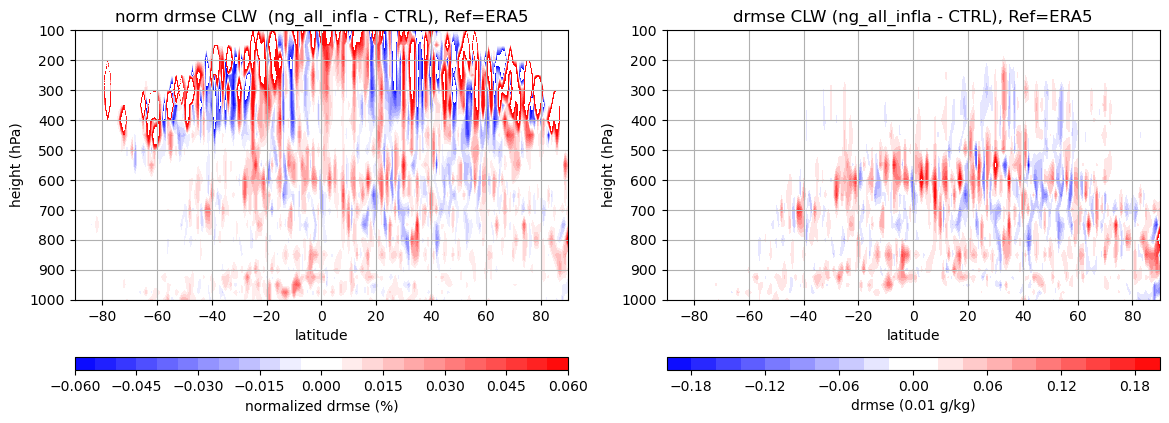

In [47]:
# For ERA5 - cloud liequid water mixing ratio

lats_era, levs_era = np.meshgrid(lat_era, lev_era)

# normalized humidity
dlevs      = 0.005
dmax       = 0.06
plt_levs_tnorm = np.arange(-dmax,dmax+dlevs,dlevs)

# absolute humidity
dlevs      = 0.02
dmax       = 0.2
plt_levs_tabs = np.arange(-dmax,dmax+dlevs,dlevs)

# Main Plot section:

# figure size:
fig = plt.figure(figsize=(14,5))

# define the subplots
ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 2

# ax1: normalized error
contour1=ax1.contourf(lats_era, levs_era, clw_era, cmap=tmap, levels=plt_levs_tnorm, vmin=np.min(plt_levs_tnorm), vmax=np.max(plt_levs_tnorm))
ax1.invert_yaxis()
#ax1.plot(np.ma.array(lats_era, mask=s95_t_era), levs_era, 'k+', ms=5)
ax1.set_xlabel('latitude')
ax1.set_ylabel('height (hPa)')
ax1.set_title(f'norm drmse CLW  ({exptest} - {expref}), Ref=ERA5')
ax1.set_ylim(1000,100)
ax1.grid(True)
# set colorbar
cbar = fig.colorbar(contour1,location='bottom',aspect=40)
cbar.set_label('normalized drmse (%)')

# ax2: absoulte error
contour2 = ax2.contourf(lats_era, levs_era, (clw_era_test - clw_era_ctrl)*1e5, cmap=tmap, levels=plt_levs_tabs, vmin=np.min(plt_levs_tabs), vmax=np.max(plt_levs_tabs))
ax2.invert_yaxis()
ax2.set_xlabel('latitude')
ax2.set_ylabel('height (hPa)')
ax2.set_title(f'drmse CLW ({exptest} - {expref}), Ref=ERA5')
ax2.set_ylim(1000,100)
ax2.grid(True)
# set colorbar
cbar = fig.colorbar(contour2,location='bottom',aspect=40)
cbar.set_label('drmse (0.01 g/kg)')

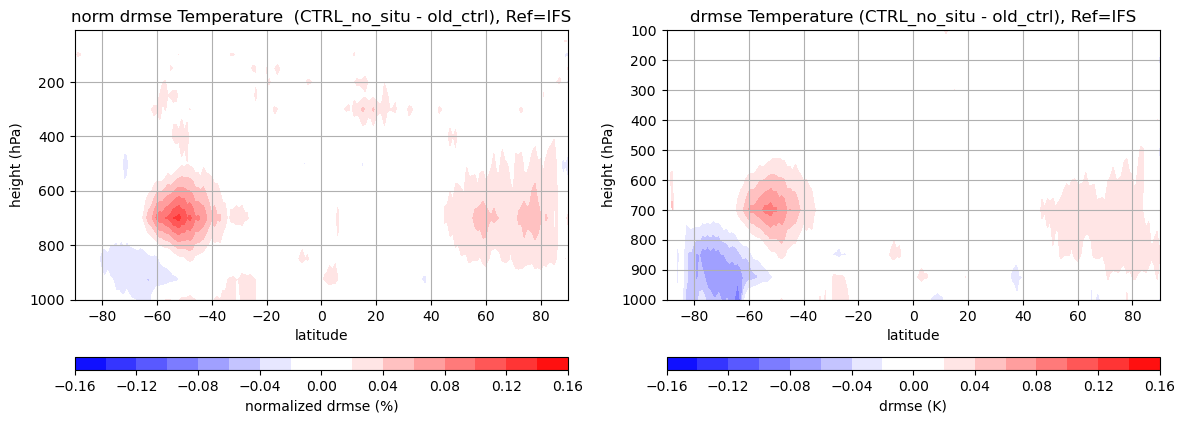

In [158]:
# For IFS - temperature:

lats_era, levs_era = np.meshgrid(lat_era, lev_era)
lats_ifs, levs_ifs = np.meshgrid(lat_ifs, lev_ifs)

# normalized temperature
dlevs      = 0.02
dmax       = 0.16
plt_levs_tnorm = np.arange(-dmax,dmax+dlevs,dlevs)

# absolute temperature
dlevs      = 0.02
dmax       = 0.16
plt_levs_tabs = np.arange(-dmax,dmax+dlevs,dlevs)

# Main Plot section:

# figure size:
fig = plt.figure(figsize=(14,5))

# define the subplots
ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 2

# ax1: normalized error
contour1=ax1.contourf(lats_ifs, levs_ifs, t_ifs, cmap=tmap, levels=plt_levs_tnorm, vmin=np.min(plt_levs_tnorm), vmax=np.max(plt_levs_tnorm))
ax1.invert_yaxis()
#ax1.plot(np.ma.array(lats_era, mask=s95_t_era), levs_era, 'k+', ms=5)
ax1.set_xlabel('latitude')
ax1.set_ylabel('height (hPa)')
ax1.set_title(f'norm drmse Temperature  ({exptest} - {expref}), Ref=IFS')
ax1.grid(True)
# set colorbar
cbar = fig.colorbar(contour1,location='bottom',aspect=40)
cbar.set_label('normalized drmse (%)')

# ax2: absoulte error
contour2 = ax2.contourf(lats_ifs, levs_ifs, (t_ifs_test - t_ifs_ctrl), cmap=tmap, levels=plt_levs_tabs, vmin=np.min(plt_levs_tabs), vmax=np.max(plt_levs_tabs))
ax2.invert_yaxis()
ax2.set_xlabel('latitude')
ax2.set_ylabel('height (hPa)')
ax2.set_title(f'drmse Temperature ({exptest} - {expref}), Ref=IFS')
ax2.set_ylim(1000,100)
ax2.grid(True)
# set colorbar
cbar = fig.colorbar(contour2,location='bottom',aspect=40)
cbar.set_label('drmse (K)')


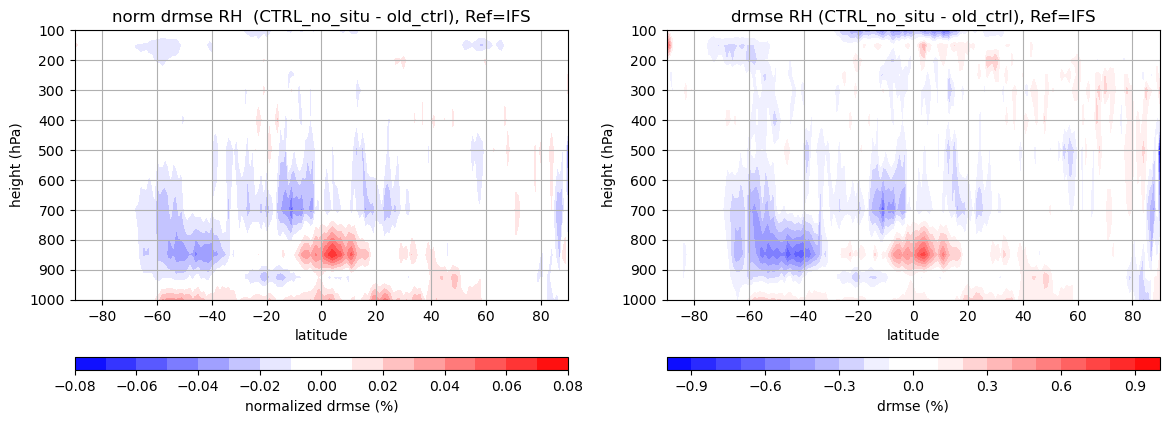

In [169]:
# For IFS - relative humidity:

lats_era, levs_era = np.meshgrid(lat_era, lev_era)
lats_ifs, levs_ifs = np.meshgrid(lat_ifs, lev_ifs)

# normalized humidity
dlevs      = 0.01
dmax       = 0.08
plt_levs_tnorm = np.arange(-dmax,dmax+dlevs,dlevs)

# absolute humidity
dlevs      = 0.1
dmax       = 1.0
plt_levs_tabs = np.arange(-dmax,dmax+dlevs,dlevs)

# Main Plot section:

# figure size:
fig = plt.figure(figsize=(14,5))

# define the subplots
ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 2

# ax1: normalized error
contour1=ax1.contourf(lats_ifs, levs_ifs, r_ifs, cmap=tmap, levels=plt_levs_tnorm, vmin=np.min(plt_levs_tnorm), vmax=np.max(plt_levs_tnorm))
ax1.invert_yaxis()
#ax1.plot(np.ma.array(lats_era, mask=s95_t_era), levs_era, 'k+', ms=5)
ax1.set_xlabel('latitude')
ax1.set_ylabel('height (hPa)')
ax1.set_title(f'norm drmse RH  ({exptest} - {expref}), Ref=IFS')
ax1.set_ylim(1000,100)
ax1.grid(True)
# set colorbar
cbar = fig.colorbar(contour1,location='bottom',aspect=40)
cbar.set_label('normalized drmse (%)')

# ax2: absoulte error
contour2 = ax2.contourf(lats_ifs, levs_ifs, (r_ifs_test - r_ifs_ctrl), cmap=tmap, levels=plt_levs_tabs, vmin=np.min(plt_levs_tabs), vmax=np.max(plt_levs_tabs))
ax2.invert_yaxis()
ax2.set_xlabel('latitude')
ax2.set_ylabel('height (hPa)')
ax2.set_title(f'drmse RH ({exptest} - {expref}), Ref=IFS')
ax2.set_ylim(1000,100)
ax2.grid(True)
# set colorbar
cbar = fig.colorbar(contour2,location='bottom',aspect=40)
cbar.set_label('drmse (%)')

In [145]:
print(plt_levs_tabs)

[-1.60000000e-01 -1.40000000e-01 -1.20000000e-01 -1.00000000e-01
 -8.00000000e-02 -6.00000000e-02 -4.00000000e-02 -2.00000000e-02
 -8.32667268e-17  2.00000000e-02  4.00000000e-02  6.00000000e-02
  8.00000000e-02  1.00000000e-01  1.20000000e-01  1.40000000e-01]


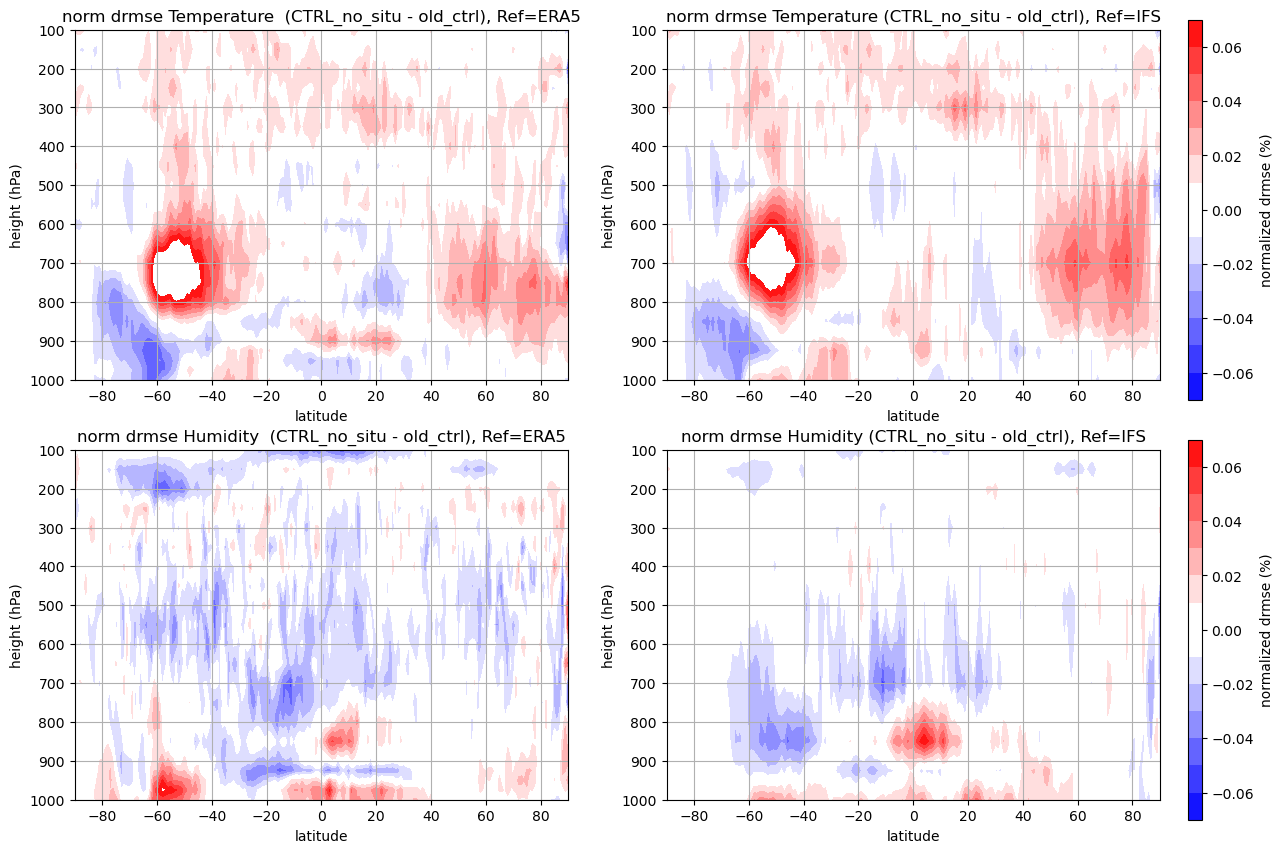

In [116]:
# Plot normalized error

lats_era, levs_era = np.meshgrid(lat_era, lev_era)
lats_ifs, levs_ifs = np.meshgrid(lat_ifs, lev_ifs)

# temperature
dlevs      = 0.01
dmax       = 0.07
plt_levs_t = np.arange(-dmax,dmax,dlevs)

# Humidity
dlevs      = 0.01
dmax       = 0.07
plt_levs_q = np.arange(-dmax,dmax,dlevs)


# Main Plot section:

# figure size:
fig = plt.figure(figsize=(14,10))

# define the subplots
ax1 = fig.add_subplot(2, 2, 1)  # Add subplot at position 1
ax2 = fig.add_subplot(2, 2, 2)  # Add subplot at position 2
ax3 = fig.add_subplot(2, 2, 3)  # Add subplot at position 3
ax4 = fig.add_subplot(2, 2, 4)  # Add subplot at position 4

# ax1-ax2: temperature
ax1.contourf(lats_era, levs_era, t_era, cmap=tmap, levels=plt_levs_t, vmin=np.min(plt_levs_t), vmax=np.max(plt_levs_t))
ax1.invert_yaxis()
#ax1.plot(np.ma.array(lats_era, mask=s95_t_era), levs_era, 'k+', ms=5)
ax1.set_xlabel('latitude')
ax1.set_ylabel('height (hPa)')
ax1.set_title(f'norm drmse Temperature  ({exptest} - {expref}), Ref=ERA5')
ax1.grid(True)

contour2 = ax2.contourf(lats_ifs, levs_ifs, t_ifs, cmap=tmap, levels=plt_levs_t, vmin=np.min(plt_levs_t), vmax=np.max(plt_levs_t))
ax2.invert_yaxis()
ax2.set_xlabel('latitude')
ax2.set_ylabel('height (hPa)')
ax2.set_title(f'norm drmse Temperature ({exptest} - {expref}), Ref=IFS')
ax2.set_ylim(1000,100)
ax2.grid(True)

# set colorbar
cbar_ax = fig.add_axes([0.92, 0.51, 0.01, 0.38])  # [left, bottom, width, height]
cbar = fig.colorbar(contour2, cax=cbar_ax)
cbar.set_label('normalized drmse (%)')

# ax3-ax4: humidity
ax3.contourf(lats_era, levs_era, q_era, cmap=tmap, levels=plt_levs_q, vmin=np.min(plt_levs_q), vmax=np.max(plt_levs_q))
ax3.invert_yaxis()
ax3.set_xlabel('latitude')
ax3.set_ylabel('height (hPa)')
ax3.set_title(f'norm drmse Humidity  ({exptest} - {expref}), Ref=ERA5')
ax3.grid(True)

contour4 = ax4.contourf(lats_ifs, levs_ifs, r_ifs, cmap=tmap, levels=plt_levs_q, vmin=np.min(plt_levs_q), vmax=np.max(plt_levs_q))
ax4.invert_yaxis()
ax4.set_xlabel('latitude')
ax4.set_ylabel('height (hPa)')
ax4.set_title(f'norm drmse Humidity ({exptest} - {expref}), Ref=IFS')
ax4.set_ylim(1000,100)
ax4.grid(True)

# set colorbar
cbar_ax = fig.add_axes([0.92, 0.09, 0.01, 0.38])  # [left, bottom, width, height]
cbar = fig.colorbar(contour2, cax=cbar_ax)
cbar.set_label('normalized drmse (%)')

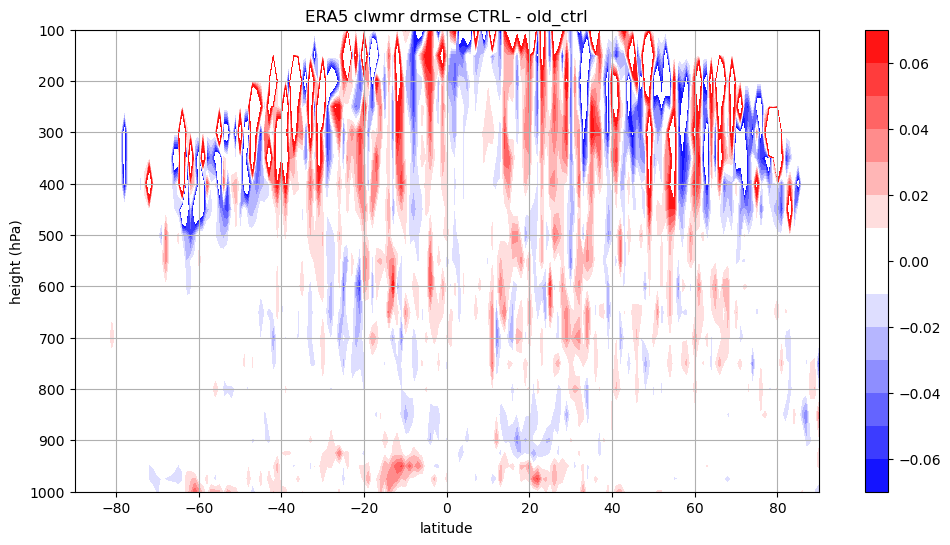

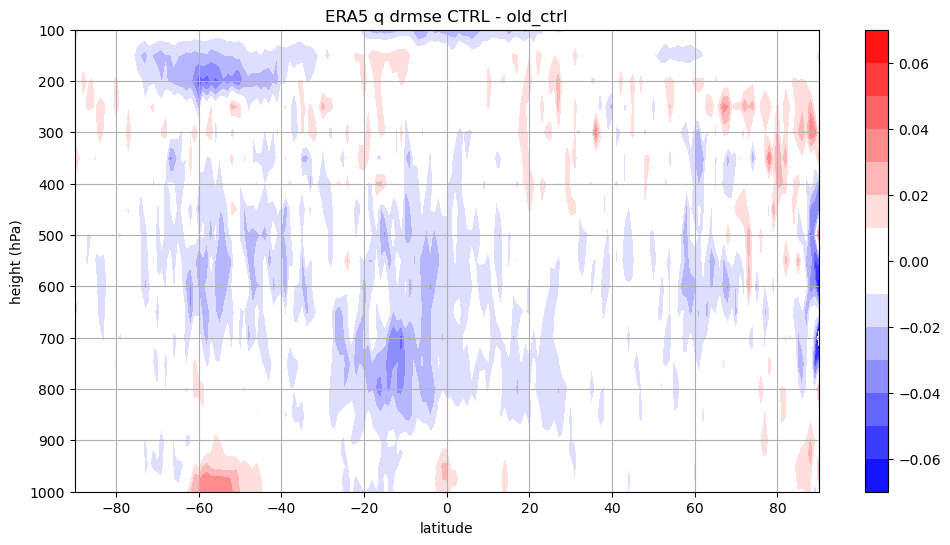

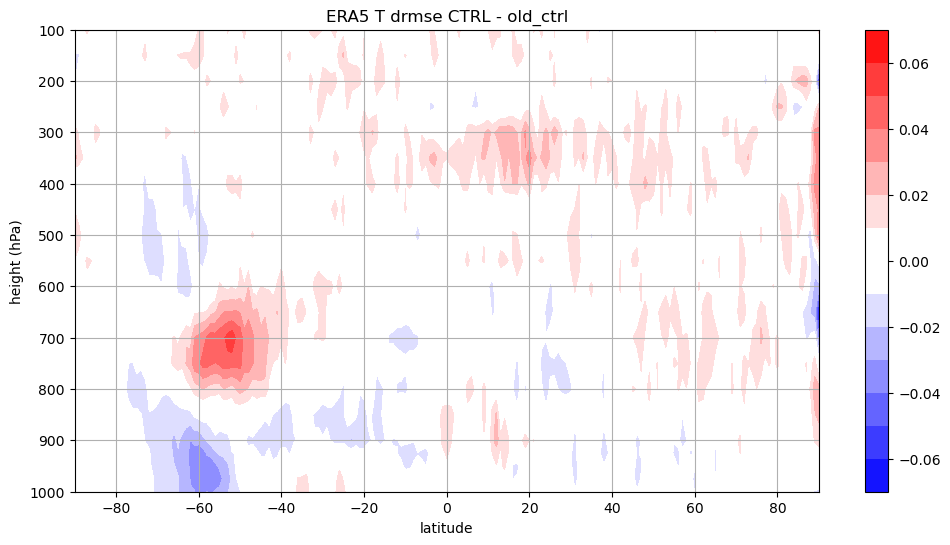

In [31]:
# For ERA5:

if reanal == 'ERA5':
    # Cloud
    dlevs   = 0.01
    dmax    = 0.07
    plt_levs= np.arange(-dmax,dmax,dlevs)
    
    lats, levs = np.meshgrid(lat, lev)
    cs = plt.contourf(lats, levs, clwmr, cmap=tmap, levels=plt_levs, vmin=-dmax, vmax=dmax)
    plt.gca().invert_yaxis()
    plt.colorbar(shrink=1.0)  # Add colorbar to show the scale
    plt.xlabel('latitude')
    plt.ylabel('height (hPa)')
    plt.title(f'ERA5 clwmr drmse {exptest} - {expref}')
    plt.grid(True)
    plt.show()
    
    # humidity
    dlevs   = 0.01
    dmax    = 0.07
    plt_levs= np.arange(-dmax,dmax,dlevs)
    
    lats, levs = np.meshgrid(lat, lev)
    cs = plt.contourf(lats, levs, q, cmap=tmap, levels=plt_levs, vmin=-dmax, vmax=dmax)
    plt.gca().invert_yaxis()
    plt.colorbar(shrink=1.0)  # Add colorbar to show the scale
    plt.xlabel('latitude')
    plt.ylabel('height (hPa)')
    plt.title(f'ERA5 q drmse {exptest} - {expref}')
    plt.grid(True)
    plt.show()
    
    # temperature
    dlevs   = 0.01
    dmax    = 0.07
    plt_levs= np.arange(-dmax,dmax,dlevs)
    
    lats, levs = np.meshgrid(lat, lev)
    cs = plt.contourf(lats, levs, t, cmap=tmap, levels=plt_levs, vmin=-dmax, vmax=dmax)
    plt.gca().invert_yaxis()
    plt.colorbar(shrink=1.0)  # Add colorbar to show the scale
    plt.xlabel('latitude')
    plt.ylabel('height (hPa)')
    plt.title(f'ERA5 T drmse {exptest} - {expref}')
    plt.grid(True)
    plt.show()
    

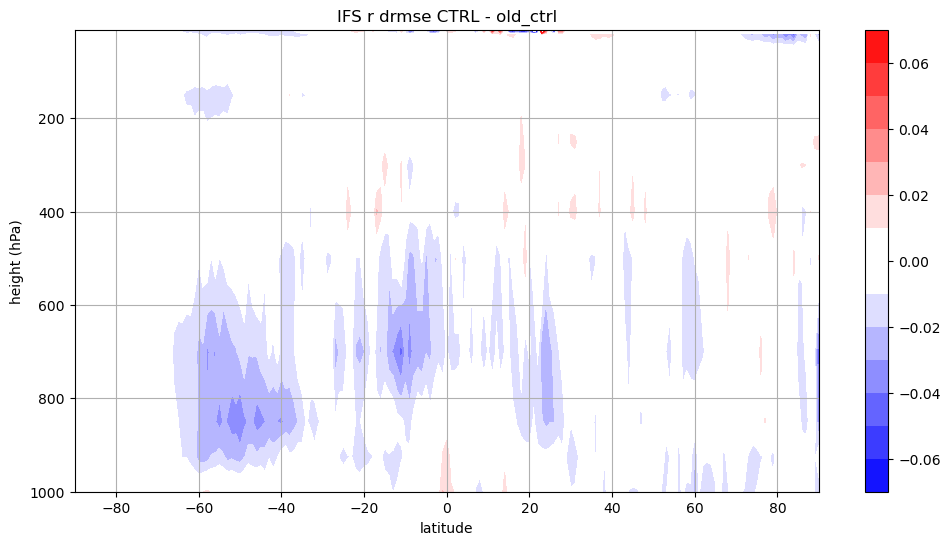

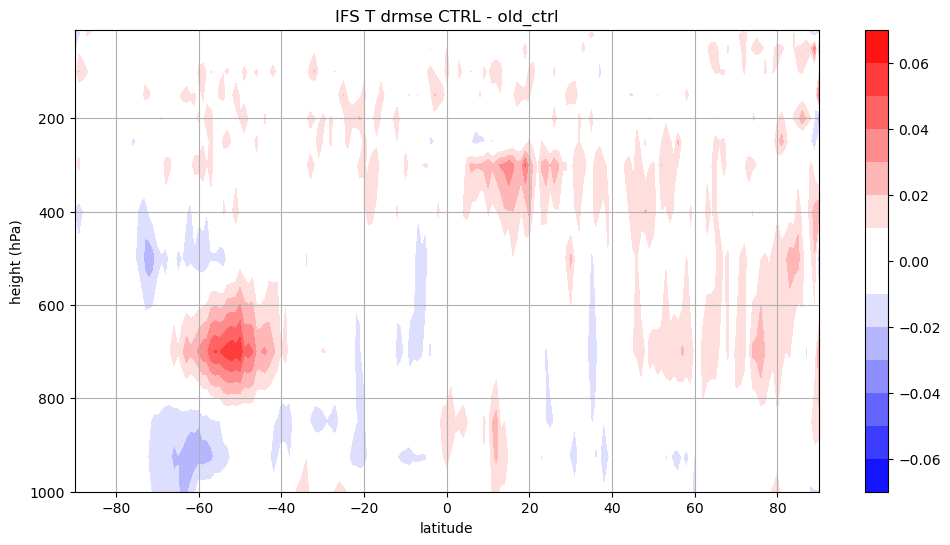

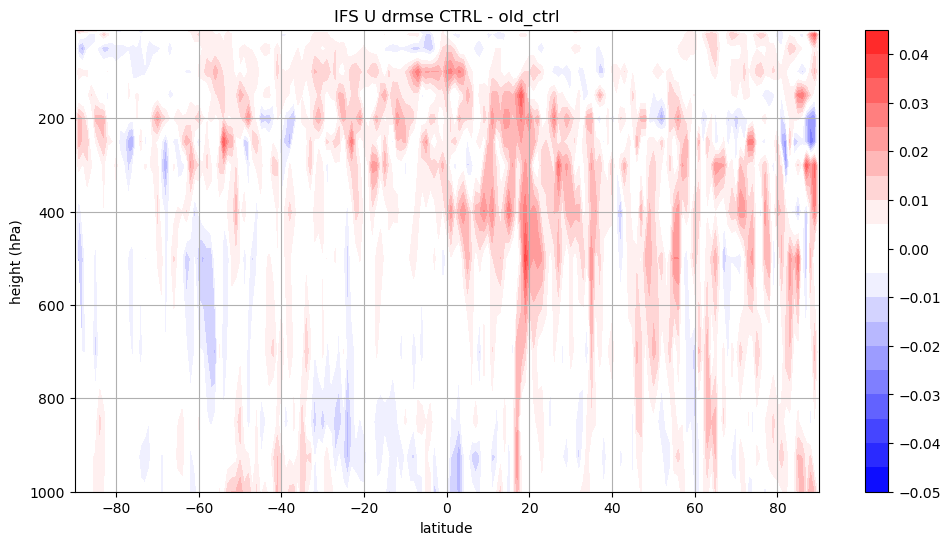

In [28]:
# for IFS:
if reanal == 'IFS':
    # humidity (IFS)
    dlevs   = 0.01
    dmax    = 0.07
    plt_levs= np.arange(-dmax,dmax,dlevs)
    
    lats, levs = np.meshgrid(lat, lev)
    cs = plt.contourf(lats, levs, r, cmap=tmap, levels=plt_levs, vmin=-dmax, vmax=dmax)
    plt.gca().invert_yaxis()
    plt.colorbar(shrink=1.0)  # Add colorbar to show the scale
    plt.xlabel('latitude')
    plt.ylabel('height (hPa)')    
    plt.title(f'IFS r drmse {exptest} - {expref}')
    plt.grid(True)
    plt.show()
    
    # temperature (IFS)
    dlevs   = 0.01
    dmax    = 0.07
    plt_levs= np.arange(-dmax,dmax,dlevs)
    
    lats, levs = np.meshgrid(lat, lev)
    cs = plt.contourf(lats, levs, t, cmap=tmap, levels=plt_levs, vmin=-dmax, vmax=dmax)
    plt.gca().invert_yaxis()
    plt.colorbar(shrink=1.0)  # Add colorbar to show the scale
    plt.xlabel('latitude')
    plt.ylabel('height (hPa)')
    plt.title(f'IFS T drmse {exptest} - {expref}')
    plt.grid(True)
    plt.show()

    # Wind U (IFS)
    dlevs   = 0.005
    dmax    = 0.05
    plt_levs= np.arange(-dmax,dmax,dlevs)
    
    lats, levs = np.meshgrid(lat, lev)
    cs = plt.contourf(lats, levs, u, cmap=tmap, levels=plt_levs, vmin=-dmax, vmax=dmax)
    plt.gca().invert_yaxis()
    plt.colorbar(shrink=1.0)  # Add colorbar to show the scale
    plt.xlabel('latitude')
    plt.ylabel('height (hPa)')
    plt.title(f'IFS U drmse {exptest} - {expref}')
    plt.grid(True)
    plt.show()

In [ ]:
print(f_drmse.variables.keys())   # get all variables names


In [ ]:
print(plt_levs)